<a href="https://colab.research.google.com/github/madhura1205/StockAnalysis/blob/main/TIMESERIES(STOCKMARKET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
pip install yfinance

In [ ]:
pip install scikit-learn

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [ ]:
import yfinance as yf
import pandas as pd

# Download stock data (e.g., Apple)
data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")

# Keep only the 'Close' column
data = data[['Close']]
data.head()
#all_data.to_excel('data.')

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2020-01-02,72.620834
2020-01-03,71.914810
2020-01-06,72.487854
2020-01-07,72.146950
2020-01-08,73.307510


In [ ]:
# prompt: save table data

data.to_excel('data.xlsx')

In [ ]:
data

Price,Close
Ticker,AAPL
Date,
2020-01-02,72.620834
2020-01-03,71.914810
2020-01-06,72.487854
2020-01-07,72.146950
2020-01-08,73.307510
...,...
2023-12-22,192.192566
2023-12-26,191.646561


In [ ]:
data

Price,Close
Ticker,AAPL
Date,
2020-01-02,72.620834
2020-01-03,71.914810
2020-01-06,72.487854
2020-01-07,72.146950
2020-01-08,73.307510
...,...
2023-12-22,192.192566
2023-12-26,191.646561


In [ ]:
data.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0


In [ ]:
print(data.columns)

MultiIndex([('Close', 'AAPL')],
           names=['Price', 'Ticker'])


In [ ]:
print(data.index)
time_diffs = data.index.to_series().diff()

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


In [ ]:
granularity = time_diffs.mode()[0]
print("Time series granularity is:", granularity)

Time series granularity is: 1 days 00:00:00


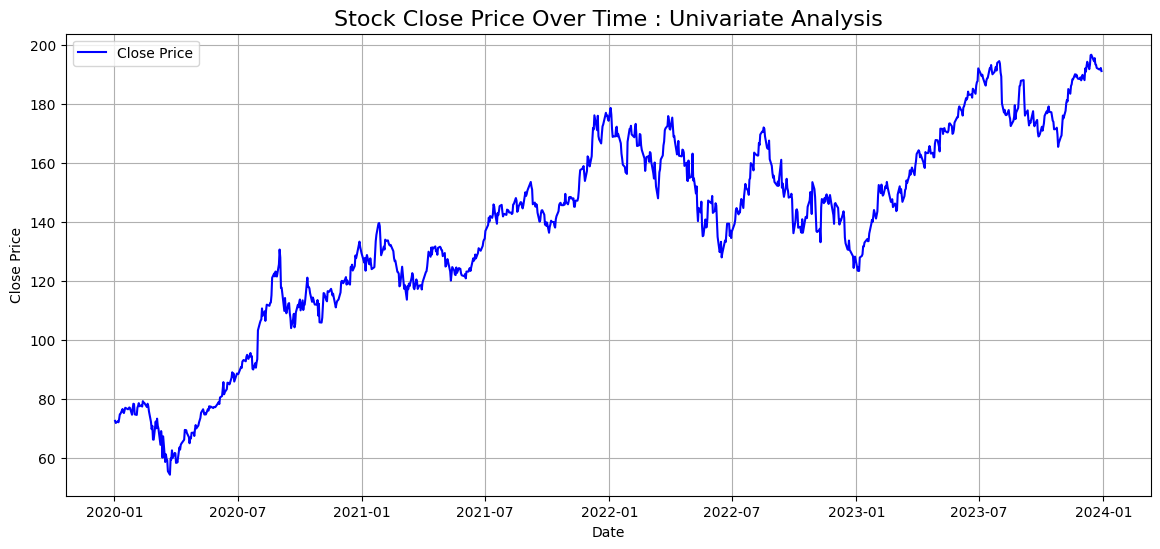

In [ ]:
plt.figure(figsize=(14, 6))

# Plot the Close price
plt.plot(data.index, data['Close'], label='Close Price', color='blue')

# Add labels and title
plt.title("Stock Close Price Over Time : Univariate Analysis", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

CHECK STATIONARITY/NON-STATIONARITY IN MEAN

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Close'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -1.511951265217678
p-value: 0.5275911524928429


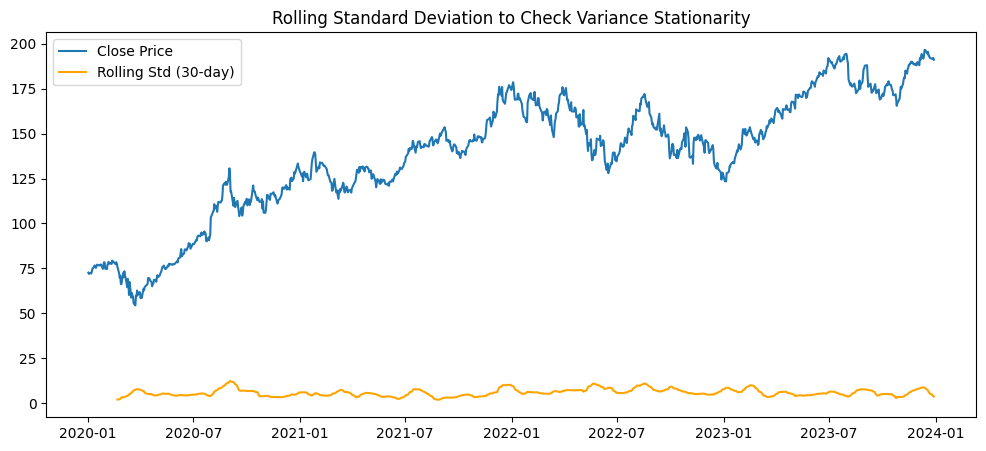

In [ ]:
rolling_std = data['Close'].rolling(window=35).std()

# Plot original series + rolling std
plt.figure(figsize=(12, 5))
plt.plot(data['Close'], label='Close Price')
plt.plot(rolling_std, label='Rolling Std (30-day)', color='orange')
plt.legend()
plt.title('Rolling Standard Deviation to Check Variance Stationarity')
plt.show()

MAKING MODEL STATIONARY

In [ ]:
data['Close_diff'] = data['Close'].diff().dropna() #lag

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close_diff'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -32.99026652503059
p-value: 0.0


ARIMA

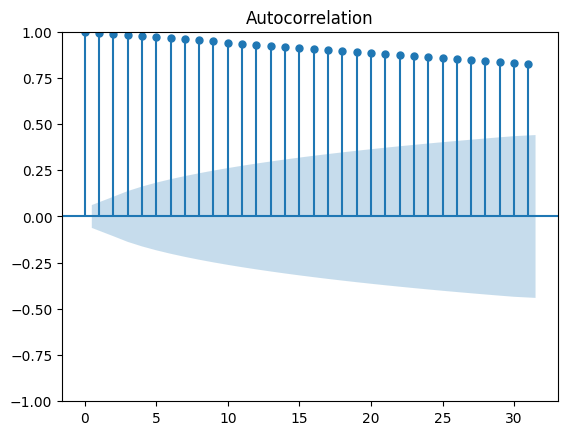

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Calculate the first
fig, ax = plt.subplots()
plot_acf(data['Close'], ax=ax) # Select the 'Close' column
plt.show()

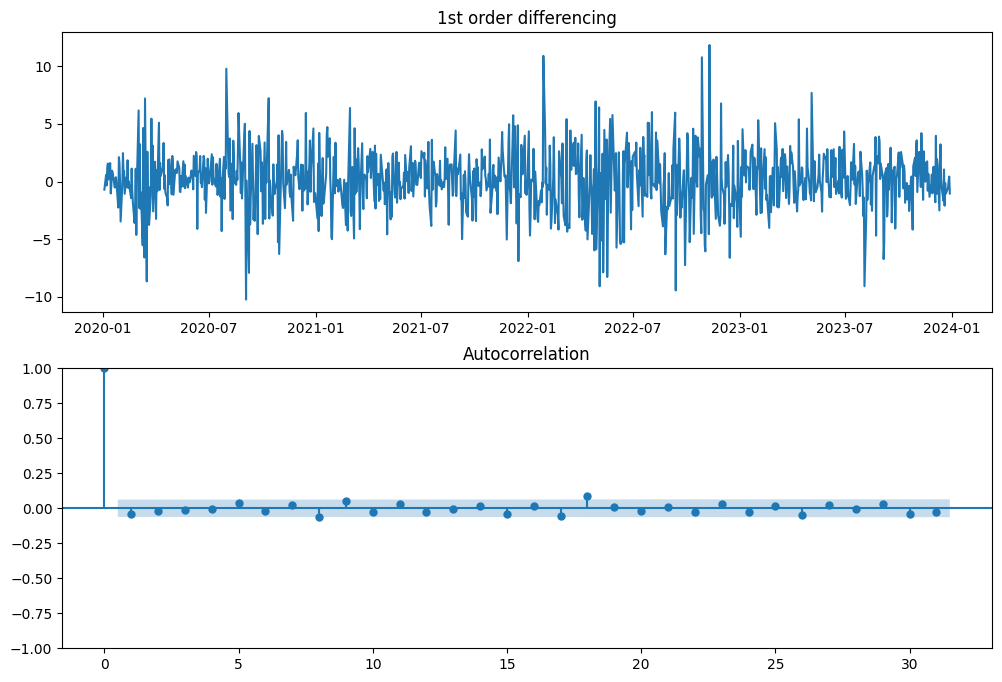

In [ ]:
f=plt.figure(figsize=(12,8))
ax1=f.add_subplot(211)
ax1.set_title('1st order differencing')
ax1.plot(data['Close'].diff())


ax2=f.add_subplot(212)
plot_acf(data['Close'].diff().dropna(), ax=ax2)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.511951265217678
p-value: 0.5275911524928429


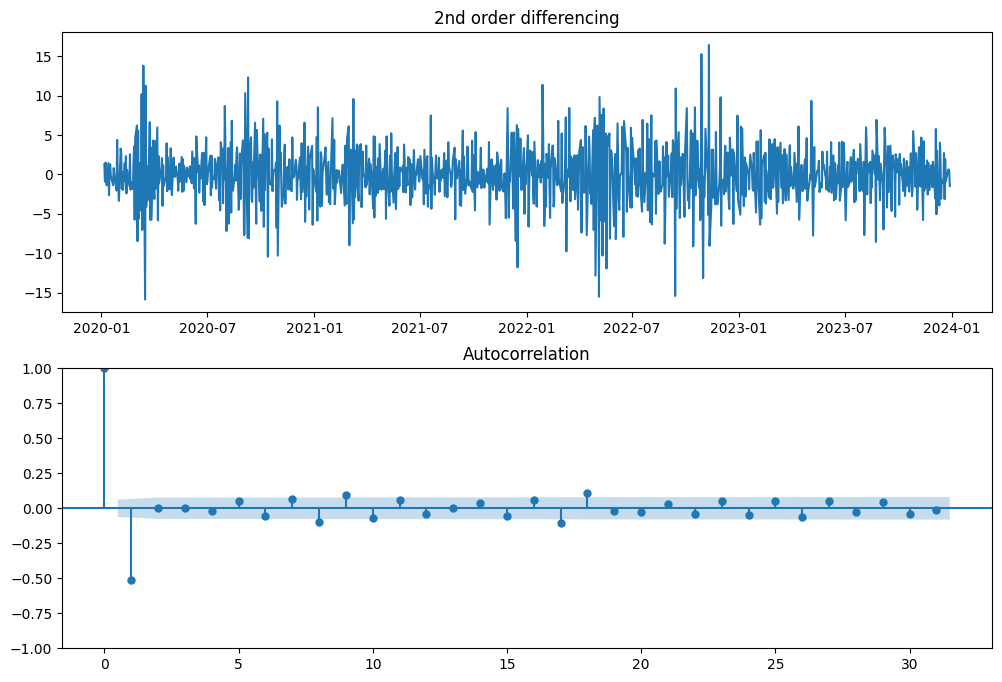

In [ ]:
f=plt.figure(figsize=(12,8))
ax1=f.add_subplot(211)
ax1.set_title('2nd order differencing')
ax1.plot(data['Close'].diff().diff())


ax2=f.add_subplot(212)
plot_acf(data['Close'].diff().diff().dropna(), ax=ax2)
plt.show()

here lag 1 is significantly diff so q=1 and d shld by 2

In [ ]:
# prompt: if i want to do adf of second order differencing

# Apply second order differencing
data['Close_diff2'] = data['Close'].diff().diff().dropna() #lag

# Perform ADF test on the second order differenced data
result_diff2 = adfuller(data['Close_diff2'].dropna())
print("\nADF Test Results for Second Order Differencing:")
print("ADF Statistic:", result_diff2[0])
print("p-value:", result_diff2[1])


ADF Test Results for Second Order Differencing:
ADF Statistic: -11.597099052469384
p-value: 2.7039452727423537e-21


PACF

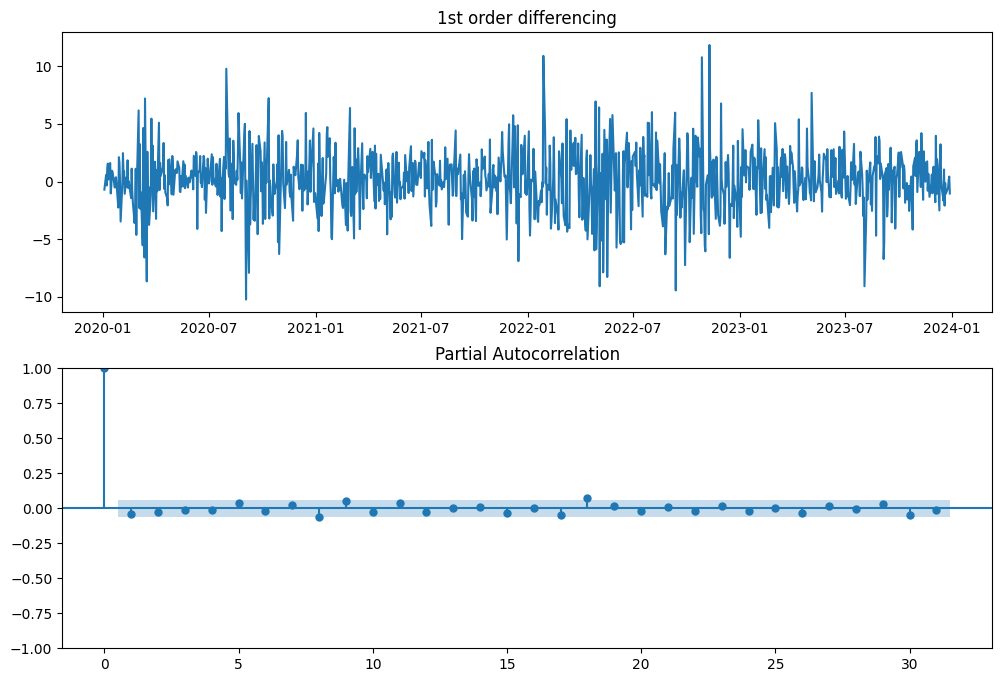

In [ ]:
f=plt.figure(figsize=(12,8))
ax1=f.add_subplot(211)
ax1.set_title('1st order differencing')
ax1.plot(data['Close'].diff())

from statsmodels.graphics.tsaplots import plot_pacf

ax2=f.add_subplot(212)
plot_pacf(data['Close'].diff().dropna(), ax=ax2)
plt.show()

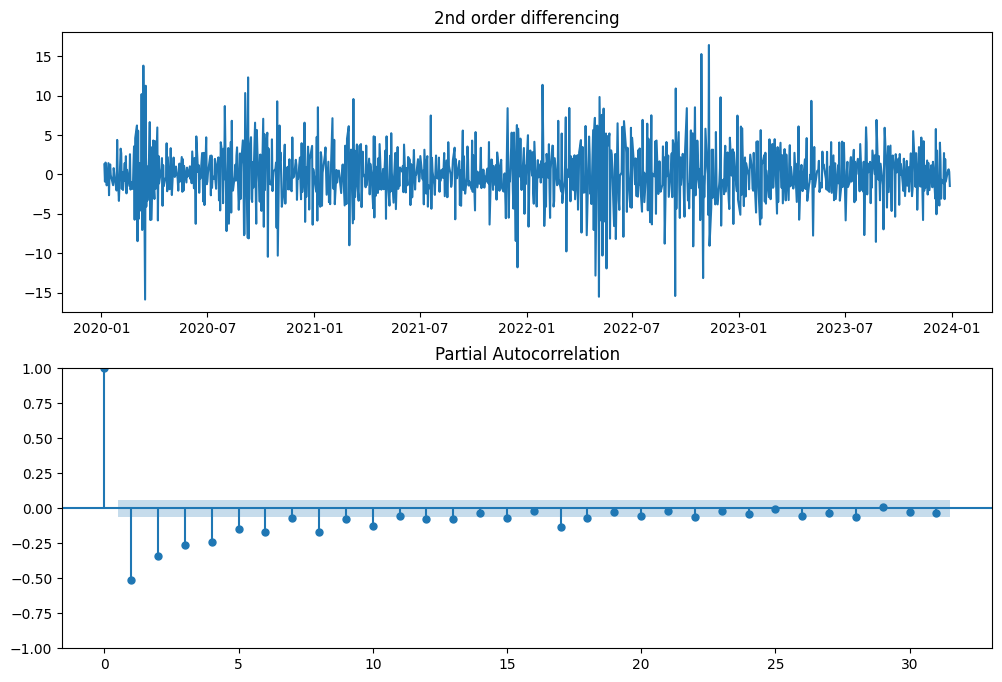

In [ ]:
f=plt.figure(figsize=(12,8))
ax1=f.add_subplot(211)
ax1.set_title('2nd order differencing')
ax1.plot(data['Close'].diff().diff())


ax2=f.add_subplot(212)
plot_pacf(data['Close'].diff().diff().dropna(), ax=ax2)
plt.show()

FOR ARIMA : (P=1,D=2,Q=1)

In [ ]:
data.head()

Price,Close,Close_diff,Close_diff2
Ticker,AAPL,,
Date,,,
2020-01-02,72.620834,NaN,NaN
2020-01-03,71.914810,-0.706024,NaN
2020-01-06,72.487854,0.573044,1.279068
2020-01-07,72.146950,-0.340904,-0.913948
2020-01-08,73.307510,1.160561,1.501465


In [ ]:
# prompt: i want to split train and test dataset to fit the arima model and train should be80% and test 20%

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size], data[train_size:]

print("Training data size:", len(train_data))
print("Testing data size:", len(test_data))


Training data size: 804
Testing data size: 202


In [ ]:
# prompt: now i want to fir the arima model of (p=6,d=2and q=0) on the train dataset

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf

# Fit ARIMA model
# (p=6, d=2, q=0)
model = ARIMA(train_data['Close'], order=(6, 2, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  804
Model:                 ARIMA(6, 2, 0)   Log Likelihood               -1986.835
Date:                Tue, 15 Jul 2025   AIC                           3987.669
Time:                        05:56:57   BIC                           4020.479
Sample:                             0   HQIC                          4000.272
                                - 804                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9176      0.030    -30.521      0.000      -0.976      -0.859
ar.L2         -0.8009      0.040    -19.904      0.000      -0.880      -0.722
ar.L3         -0.6703      0.044    -15.243      0.0

Forecasted values:
[149.36 149.48 148.8  148.61 148.38 148.29 148.56 148.49 148.36 148.17
 148.09 148.04 147.99 147.95 147.85 147.76 147.67 147.6  147.54 147.46
 147.39 147.3  147.23 147.15 147.08 147.   146.93 146.85 146.77 146.7
 146.62 146.55 146.47 146.4  146.32 146.24 146.17 146.09 146.02 145.94
 145.86 145.79 145.71 145.64 145.56 145.48 145.41 145.33 145.26 145.18
 145.11 145.03 144.95 144.88 144.8  144.73 144.65 144.57 144.5  144.42
 144.35 144.27 144.2  144.12 144.04 143.97 143.89 143.82 143.74 143.66
 143.59 143.51 143.44 143.36 143.28 143.21 143.13 143.06 142.98 142.91
 142.83 142.75 142.68 142.6  142.53 142.45 142.37 142.3  142.22 142.15
 142.07 142.   141.92 141.84 141.77 141.69 141.62 141.54 141.46 141.39
 141.31 141.24 141.16 141.08 141.01 140.93 140.86 140.78 140.71 140.63
 140.55 140.48 140.4  140.33 140.25 140.17 140.1  140.02 139.95 139.87
 139.8  139.72 139.64 139.57 139.49 139.42 139.34 139.26 139.19 139.11
 139.04 138.96 138.88 138.81 138.73 138.66 138.58 138.51 13

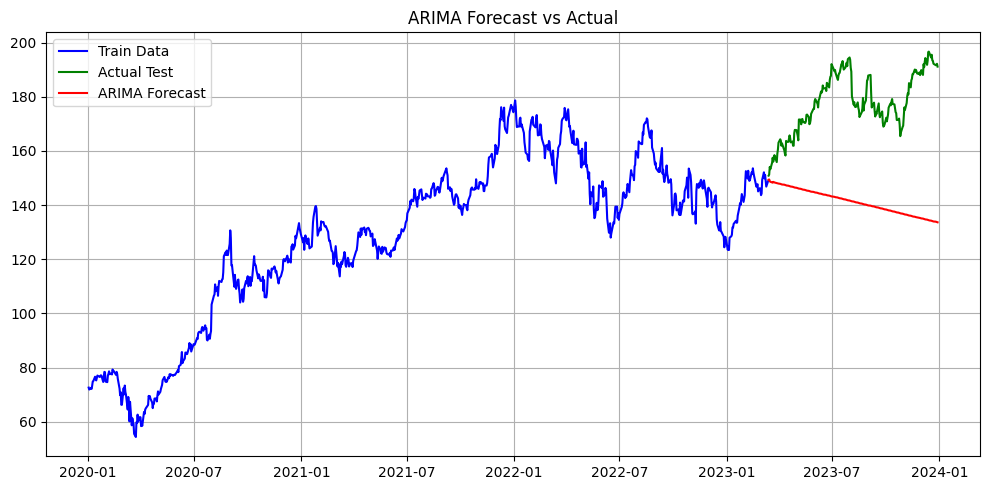

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

forecast = model_fit.forecast(steps=len(test_data))
forecast.index = test_data.index  # align index with test set

# Step 4: Evaluation
print("Forecasted values:")
print(np.round(forecast.values, 2))
print("\nActual values:")
print(np.round(test_data.values, 2))

rmse = np.sqrt(mean_squared_error(test_data['Close'], forecast))
mae = mean_absolute_error(test_data['Close'], forecast)
print(f"\n✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")

# Step 5: Plot
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(train_data['Close'], label='Train Data', color='blue')
ax.plot(test_data['Close'], label='Actual Test', color='green')
ax.plot(forecast, label='ARIMA Forecast', color='red')

ax.legend()
plt.title('ARIMA Forecast vs Actual')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
for p in range(1, 6):  # Try p from 1 to 7
    model = ARIMA(train_data['Close'], order=(p, 2, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data))
    rmse = np.sqrt(mean_squared_error(test_data['Close'], forecast))
    print(f"p={p} ➤ RMSE: {rmse:.2f}")

p=1 ➤ RMSE: 41.00
p=2 ➤ RMSE: 45.09
p=3 ➤ RMSE: 53.84
p=4 ➤ RMSE: 76.59
p=5 ➤ RMSE: 69.93


In [ ]:


# # Just use Close column
# ts = data['Close'].asfreq('D')  # or 'B' for business days
# ts = ts.fillna(method='ffill')

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(ts, order=(6, 2, 0))
# model_fit = model.fit()
# print(model_fit.summary())

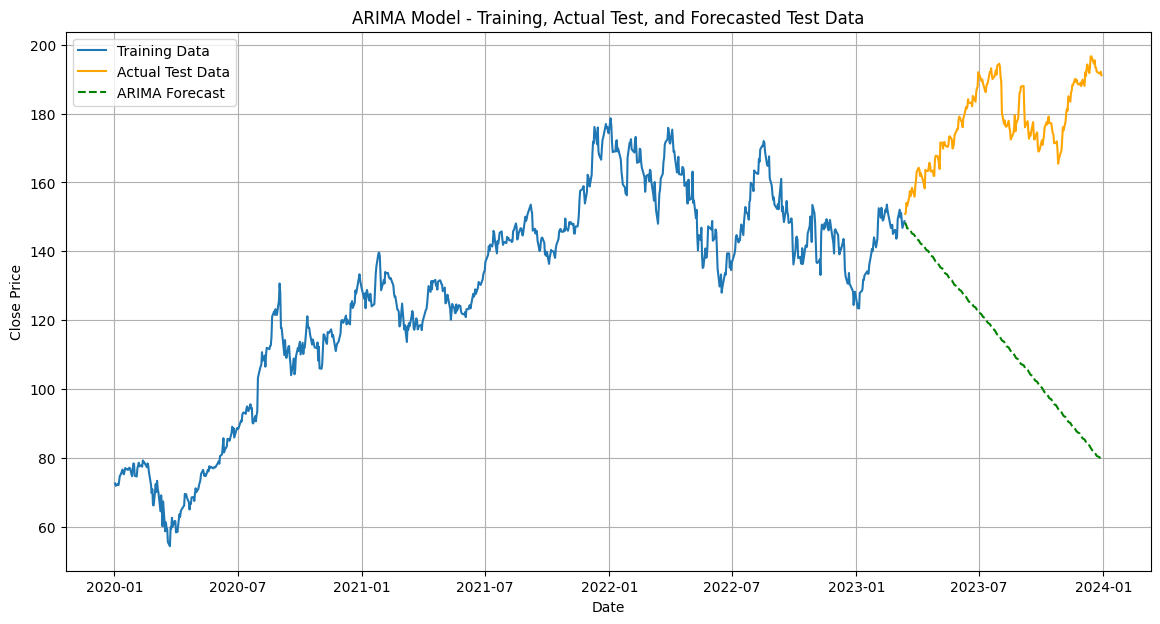

In [ ]:
# prompt: i want to generate the graph but acc to train and test daatset

# Forecast on the test data
start_index = len(train_data)
end_index = len(data) - 1
forecast = model_fit.predict(start=start_index, end=end_index)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data', color='orange')
plt.plot(test_data.index, forecast, label='ARIMA Forecast', color='green', linestyle='--')
plt.title('ARIMA Model - Training, Actual Test, and Forecasted Test Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

ALL VARIATIONS OF (P,D,Q)

In [ ]:
# prompt: in the code below i also want to calculate MAPE so edit the code acc

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if np.all(y_true != 0) else np.inf

mape = mean_absolute_percentage_error(test_data['Close'], forecast)
print(f"✅ MAPE: {mape:.2f}%")

# Calculate MAPE for the loop as well
for p in range(1, 6):  # Try p from 1 to 7
    model = ARIMA(train_data['Close'], order=(p, 2, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data))
    rmse = np.sqrt(mean_squared_error(test_data['Close'], forecast))
    mape = mean_absolute_percentage_error(test_data['Close'], forecast)
    print(f"p={p} ➤ RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")


✅ MAPE: 35.76%
p=1 ➤ RMSE: 41.00, MAPE: 21.68%
p=2 ➤ RMSE: 45.09, MAPE: 23.33%
p=3 ➤ RMSE: 53.84, MAPE: 27.73%
p=4 ➤ RMSE: 76.59, MAPE: 39.09%
p=5 ➤ RMSE: 69.93, MAPE: 35.76%


In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
import pandas as pd
import numpy as np

q_values = [1, 5,8,18] # i have to manually do 1*5
p_range = range(1, 7)  # p from 1 to 6
d = 2

results = []

for p in p_range:
    for q in q_values:
        try:
            model = ARIMA(train_data['Close'], order=(p, d, q))
            model_fit = model.fit()

            forecast = model_fit.forecast(steps=len(test_data))
            forecast.index = test_data.index

            rmse = np.sqrt(mean_squared_error(test_data['Close'], forecast))
            mae = mean_absolute_error(test_data['Close'], forecast)
            mape = mean_absolute_percentage_error(test_data['Close'], forecast)


            results.append( {
                'p': p,
                'd': d,
                'q': q,
                'RMSE': round(rmse, 2),
                'MAE':  round(mae, 2),
                'MAPE': round(mape, 2)
            }
                           )


        except Exception as e:
            print(f"ARIMA({p},{d},{q}) failed: {e}")

# Display results as a sorted DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE')  # sort by RMSE (or MAE if you prefer)

print("\n ARIMA Model Results (sorted by RMSE):")
print(results_df.to_string(index=False))



 ARIMA Model Results (sorted by RMSE):
 p  d  q  RMSE   MAE  MAPE
 6  2  5 20.80 18.95  0.10
 2  2  5 20.86 19.01  0.10
 5  2  8 20.87 19.03  0.10
 2  2  8 20.92 19.08  0.11
 5  2  5 20.96 19.12  0.11
 3  2  8 20.97 19.14  0.11
 6  2  8 21.00 19.17  0.11
 4  2  1 21.00 19.17  0.11
 3  2  1 21.01 19.18  0.11
 1  2  5 21.03 19.21  0.11
 2  2  1 21.09 19.26  0.11
 1  2  1 21.12 19.30  0.11
 1  2 18 21.14 19.32  0.11
 4  2 18 21.16 19.35  0.11
 6  2  1 21.17 19.36  0.11
 5  2  1 21.20 19.39  0.11
 1  2  8 21.32 19.51  0.11
 4  2  5 21.38 19.55  0.11
 3  2  5 21.64 19.83  0.11
 5  2 18 21.65 19.85  0.11
 6  2 18 21.89 20.10  0.11
 2  2 18 23.75 21.97  0.12
 3  2 18 23.87 22.09  0.12
 4  2  8 24.39 22.60  0.12


ACCORDING TO THIS p,d,q = 6,2,5 it gives the best output


In [ ]:
# prompt: now i want to fir the arima model of (p=6,d=2and q=0) on the train dataset

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf

# Fit ARIMA model
# (p=6, d=2, q=0)
model = ARIMA(train_data['Close'], order=(6, 2, 5))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  804
Model:                 ARIMA(6, 2, 5)   Log Likelihood               -1930.015
Date:                Tue, 15 Jul 2025   AIC                           3884.031
Time:                        06:00:25   BIC                           3940.276
Sample:                             0   HQIC                          3905.635
                                - 804                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.6210      0.068    -38.550      0.000      -2.754      -2.488
ar.L2         -3.4023      0.167    -20.374      0.000      -3.730      -3.075
ar.L3         -2.7066      0.191    -14.134      0.0

Predicted closing prices for the test dataset:
[149.13 149.26 149.29 149.26 149.26 149.98 149.15 149.96 149.78 149.94
 149.86 150.21 150.3  149.94 150.78 150.22 150.71 150.53 150.98 150.69
 150.93 151.28 150.85 151.47 151.16 151.64 151.26 151.84 151.65 151.7
 152.09 151.82 152.27 151.96 152.58 152.12 152.62 152.57 152.59 152.87
 152.72 153.17 152.76 153.42 153.03 153.43 153.4  153.5  153.69 153.55
 154.06 153.63 154.23 153.92 154.3  154.22 154.38 154.57 154.38 154.9
 154.52 155.06 154.77 155.18 155.06 155.22 155.44 155.25 155.73 155.4
 155.92 155.61 156.04 155.93 156.06 156.29 156.13 156.56 156.26 156.78
 156.47 156.88 156.8  156.92 157.13 157.   157.42 157.11 157.63 157.34
 157.73 157.65 157.79 157.97 157.86 158.27 157.98 158.48 158.21 158.59
 158.5  158.65 158.83 158.71 159.12 158.84 159.32 159.06 159.44 159.35
 159.51 159.68 159.58 159.96 159.71 160.17 159.92 160.3  160.21 160.37
 160.53 160.44 160.81 160.57 161.02 160.78 161.15 161.07 161.23 161.38
 161.3  161.66 161.43 161.87 161.

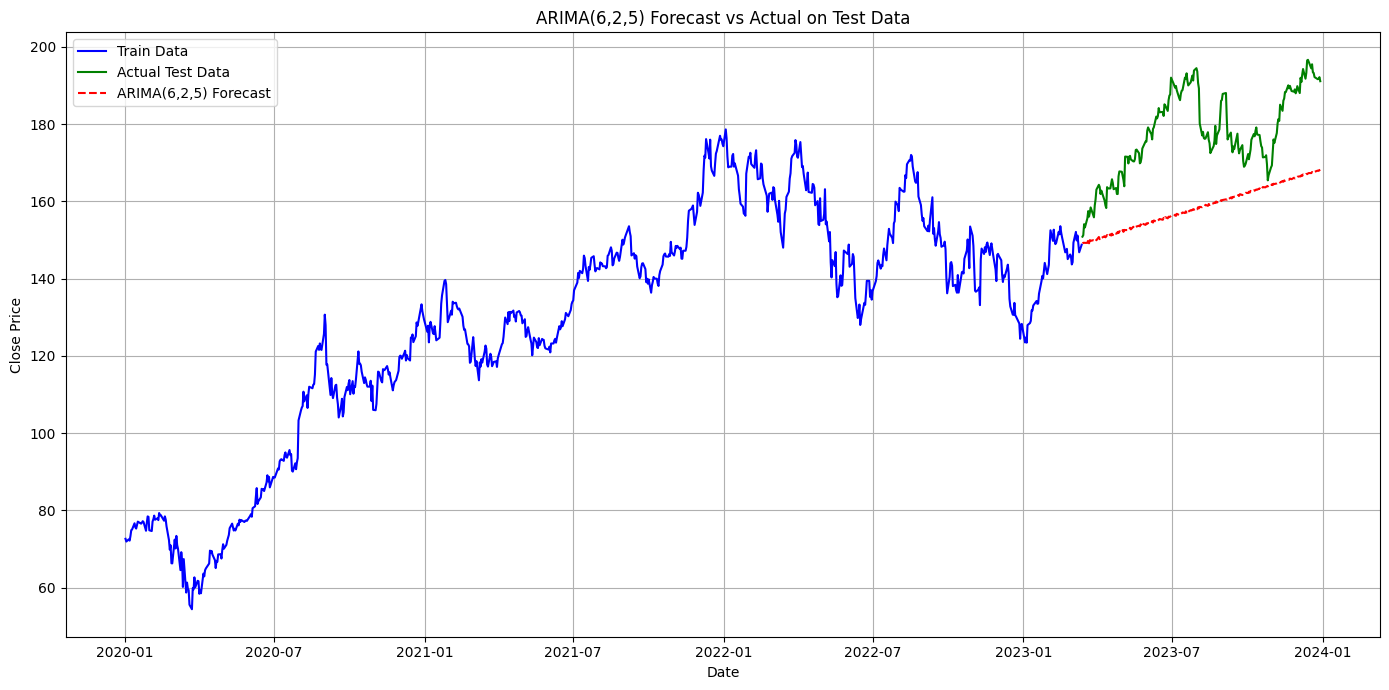

In [ ]:
# Predict the closing prices for the test dataset using the chosen ARIMA model (6, 2, 5)
start_index = len(train_data)
end_index = len(data) - 1
forecast_test = model_fit.predict(start=start_index, end=end_index)

# Align the forecast index with the test data index for comparison and plotting
forecast_test.index = test_data.index

# Print the predictions and the actual values for comparison
print("Predicted closing prices for the test dataset:")
print(np.round(forecast_test.values, 2))

print("\nActual closing prices for the test dataset:")
print(np.round(test_data['Close'].values, 2))

# Evaluate the predictions
rmse_test = np.sqrt(mean_squared_error(test_data['Close'], forecast_test))
mae_test = mean_absolute_error(test_data['Close'], forecast_test)
mape_test = mean_absolute_percentage_error(test_data['Close'], forecast_test)

print(f"\nEvaluation on Test Dataset (ARIMA(6,2,5)):")
print(f" RMSE: {rmse_test:.2f}")
print(f" MAE: {mae_test:.2f}")
print(f" MAPE: {mape_test:.2f}%")

# Plot the training data, actual test data, and the forecast for the test data
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(train_data.index, train_data['Close'], label='Train Data', color='blue')
ax.plot(test_data.index, test_data['Close'], label='Actual Test Data', color='green')
ax.plot(test_data.index, forecast_test, label='ARIMA(6,2,5) Forecast', color='red', linestyle='--')

ax.legend()
plt.title('ARIMA(6,2,5) Forecast vs Actual on Test Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: my p,d,q values are 6,2,5 and i fit my model now i want to train and forecast it for 20 days

# Forecast the next 20 days
forecast_steps = 20
forecast_future = model_fit.forecast(steps=forecast_steps)

# Create a date index for the future forecast
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='B') # Assuming business days, change freq if needed

forecast_future.index = future_dates

print("\nFuture Forecast for the next 20 days:")
print(np.round(forecast_future.values, 2))





Future Forecast for the next 20 days:
[149.13 149.26 149.29 149.26 149.26 149.98 149.15 149.96 149.78 149.94
 149.86 150.21 150.3  149.94 150.78 150.22 150.71 150.53 150.98 150.69]


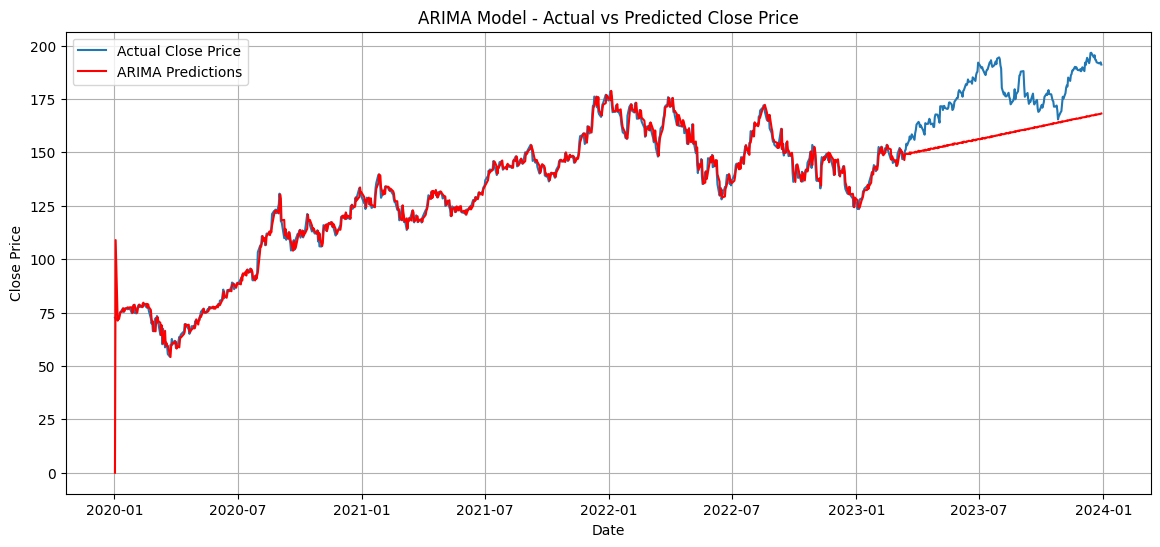

In [ ]:
# Get predictions
predictions = model_fit.predict(start=0, end=len(data)-1)

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.plot(data.index, predictions, color='red', label='ARIMA Predictions')
plt.title('ARIMA Model - Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


actual-predicted/actual

LSTM


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']])

In [ ]:
def create_lagged_dataset(data, lag=30):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i - lag:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_lagged_dataset(scaled_data, lag=30)

In [ ]:
# Convert back to original scale for readability
X_inverse = scaler.inverse_transform(X.reshape(-1, 1)).reshape(X.shape)
y_inverse = scaler.inverse_transform(y)

# Print first 5 sequences with targets
for i in range(5):
    print(f"\n Sequence {i+1} (Past 30 Days):")
    print(np.round(X_inverse[i].flatten(), 2))  # print past 30 days
    print(f" Target (Day 31): {np.round(y_inverse[i][0], 2)}")



 Sequence 1 (Past 30 Days):
[72.62 71.91 72.49 72.15 73.31 74.86 75.03 76.64 75.6  75.28 76.22 77.06
 76.54 76.82 77.19 76.96 74.7  76.81 78.42 78.31 74.84 74.63 77.09 77.72
 78.63 77.56 77.93 77.46 79.3  78.74]
 Target (Day 31): 78.76

 Sequence 2 (Past 30 Days):
[71.91 72.49 72.15 73.31 74.86 75.03 76.64 75.6  75.28 76.22 77.06 76.54
 76.82 77.19 76.96 74.7  76.81 78.42 78.31 74.84 74.63 77.09 77.72 78.63
 77.56 77.93 77.46 79.3  78.74 78.76]
 Target (Day 31): 77.31

 Sequence 3 (Past 30 Days):
[72.49 72.15 73.31 74.86 75.03 76.64 75.6  75.28 76.22 77.06 76.54 76.82
 77.19 76.96 74.7  76.81 78.42 78.31 74.84 74.63 77.09 77.72 78.63 77.56
 77.93 77.46 79.3  78.74 78.76 77.31]
 Target (Day 31): 78.43

 Sequence 4 (Past 30 Days):
[72.15 73.31 74.86 75.03 76.64 75.6  75.28 76.22 77.06 76.54 76.82 77.19
 76.96 74.7  76.81 78.42 78.31 74.84 74.63 77.09 77.72 78.63 77.56 77.93
 77.46 79.3  78.74 78.76 77.31 78.43]
 Target (Day 31): 77.63

 Sequence 5 (Past 30 Days):
[73.31 74.86 75.03 76.6

In [ ]:
# prompt: edit the below code such that x and y have same Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 196
# 'y' sizes: 166

# The error occurs because the differencing operations introduce NaNs at the beginning
# of the differenced series. When splitting the data or creating lagged features,
# these NaNs can cause the training and target arrays (x and y) to have different lengths.

# Solution: Apply differencing *before* splitting into train/test or creating lagged data.
# Ensure that NaNs resulting from differencing are handled (e.g., dropped) consistently
# before creating the train/test split or the lagged dataset for LSTM.

# We'll apply the differencing first and then create the train/test split.
# For LSTM, we'll create the lagged dataset from the original scaled data first,
# which inherently handles the shifting, resulting in matched lengths for X and y.


# Re-download data to start fresh from the original
data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
data = data[['Close']]

# For ARIMA: Apply differencing and drop NaNs before splitting
data['Close_diff'] = data['Close'].diff()
data['Close_diff2'] = data['Close_diff'].diff()
# Drop the rows with NaNs introduced by differencing
data_arima = data['Close_diff2'].dropna().to_frame()

# Split data_arima into training and testing sets for ARIMA
train_size_arima = int(len(data_arima) * 0.8)
train_data_arima, test_data_arima = data_arima[0:train_size_arima], data_arima[train_size_arima:]

print("ARIMA Training data size (after differencing):", len(train_data_arima))
print("ARIMA Testing data size (after differencing):", len(test_data_arima))


# For LSTM: Apply scaling on the original data and then create lagged dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']]) # Use original data for scaling

def create_lagged_dataset(data, lag=30):
    X, y = [], []
    for i in range(lag, len(data)):
        # X is a sequence of 'lag' previous points
        X.append(data[i - lag:i, 0]) # Extract the scalar value
        # y is the next point
        y.append(data[i, 0]) # Extract the scalar value
    return np.array(X), np.array(y) # Return numpy arrays

X_lstm, y_lstm = create_lagged_dataset(scaled_data, lag=30)

# Split LSTM data into training and testing sets
train_size_lstm = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[0:train_size_lstm], X_lstm[train_size_lstm:]
y_train_lstm, y_test_lstm = y_lstm[0:train_size_lstm], y_lstm[train_size_lstm:]


print("\nLSTM X_train size:", len(X_train_lstm))
print("LSTM y_train size:", len(y_train_lstm))
print("LSTM X_test size:", len(X_test_lstm))
print("LSTM y_test size:", len(y_test_lstm))

# Verify that x and y have the same length for LSTM
print("\nLSTM X shape:", X_lstm.shape)
print("LSTM y shape:", y_lstm.shape)


# Convert back to original scale for readability (demonstration)
# X_inverse = scaler.inverse_transform(X_lstm).reshape(X_lstm.shape[0], X_lstm.shape[1], 1) # Need to reshape X correctly
# y_inverse = scaler.inverse_transform(y_lstm.reshape(-1, 1)) # Reshape y for inverse transform


# The rest of your code will use train_data_arima, test_data_arima for ARIMA
# and X_train_lstm, y_train_lstm, X_test_lstm, y_test_lstm for LSTM

# Example of how to fit the ARIMA model using the new train/test data
# model = ARIMA(train_data_arima, order=(p, d, q)) # Use data_arima train split
# model_fit = model.fit()
# forecast = model_fit.forecast(steps=len(test_data_arima)) # Use data_arima test split length
# forecast.index = test_data_arima.index # Align index


[*********************100%***********************]  1 of 1 completed

ARIMA Training data size (after differencing): 803
ARIMA Testing data size (after differencing): 201

LSTM X_train size: 780
LSTM y_train size: 780
LSTM X_test size: 196
LSTM y_test size: 196

LSTM X shape: (976, 30)
LSTM y shape: (976,)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1023 - val_loss: 0.0094
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0

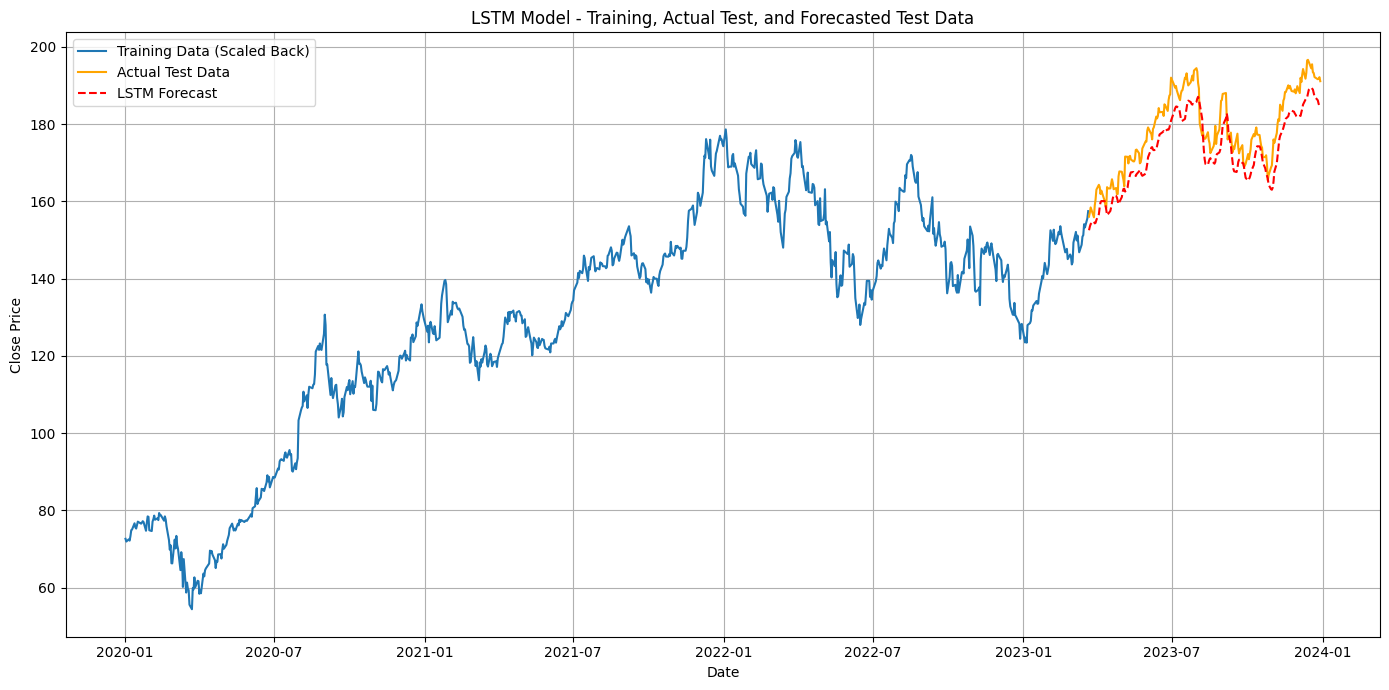

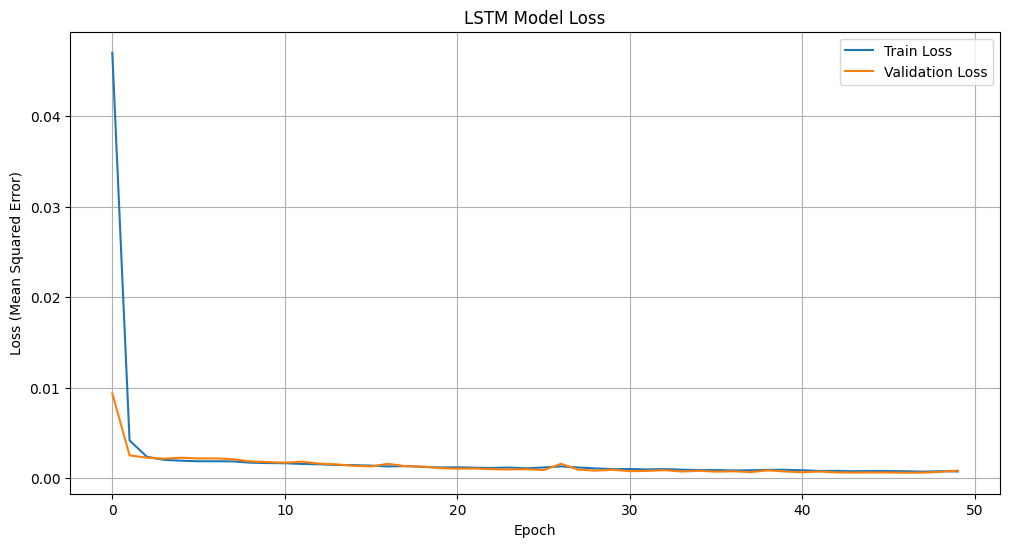

In [ ]:
# prompt: build model acc to the train and tets

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

# Ensure LSTM input shape is correct (samples, timesteps, features)
# Here, features is 1 as we are using a single column ('Close')
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# Use a small batch size for time series data
# Use early stopping or reduce epochs if overfitting occurs
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
lstm_predictions_scaled = lstm_model.predict(X_test_lstm)

# Inverse transform the predictions and actual values to the original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
y_test_actual = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Calculate evaluation metrics for LSTM
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, lstm_predictions))
mae_lstm = mean_absolute_error(y_test_actual, lstm_predictions)
mape_lstm = mean_absolute_percentage_error(y_test_actual, lstm_predictions)


print(f"\nEvaluation on Test Dataset (LSTM):")
print(f" RMSE: {rmse_lstm:.2f}")
print(f" MAE: {mae_lstm:.2f}")
print(f" MAPE: {mape_lstm:.2f}%")

# Plot the results for LSTM
# Need to create a date index for the LSTM test predictions
# The dates for the LSTM test set correspond to the last len(X_test_lstm) + lag days of the original data
lstm_test_dates = data.index[-len(y_test_lstm):] # Use the original data index for the target values

plt.figure(figsize=(14, 7))
plt.plot(data.index[:len(X_train_lstm) + 30], scaler.inverse_transform(scaled_data[:len(X_train_lstm) + 30]), label='Training Data (Scaled Back)')
plt.plot(lstm_test_dates, y_test_actual, label='Actual Test Data', color='orange')
plt.plot(lstm_test_dates, lstm_predictions, label='LSTM Forecast', color='red', linestyle='--')

plt.title('LSTM Model - Training, Actual Test, and Forecasted Test Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()



Future Forecast for the next 20 days (LSTM):
[152.53 152.6  152.   151.04 149.88 148.64 147.36 146.09 144.85 143.67
 142.55 141.5  140.51 139.6  138.74 137.94 137.19 136.48 135.8  135.16]


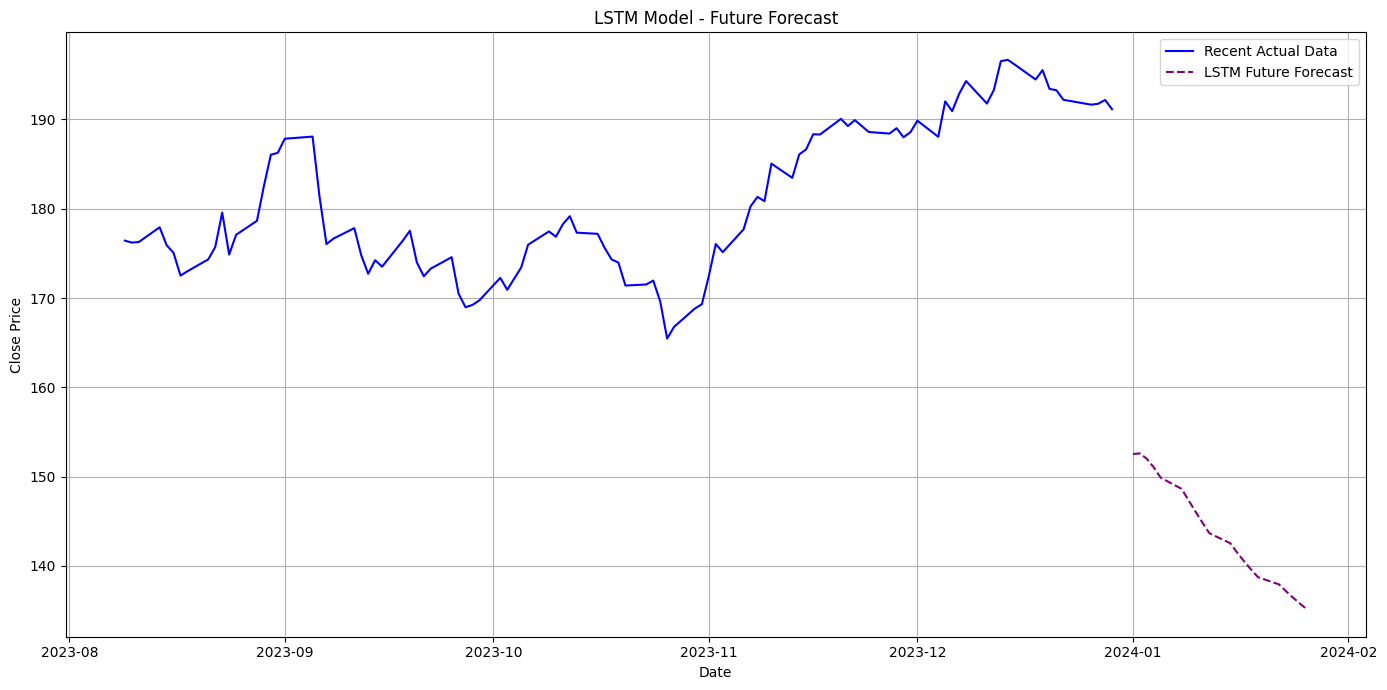

In [ ]:
# prompt: now evaluate and predict

# Define the lag value used for creating the dataset
lag = 30 # Define lag here

# Function to predict future steps using the trained LSTM model
def predict_future_lstm(model, initial_sequence, num_steps, scaler, lag=lag):
    """
    Predicts future stock prices using a trained LSTM model.

    Args:
        model: The trained Keras LSTM model.
        initial_sequence: The last 'lag' days of scaled data from the training set.
                          Shape should be (1, lag, 1).
        num_steps: The number of future steps to predict.
        scaler: The MinMaxScaler used for scaling the data.
        lag: The number of past days used as input (timesteps).

    Returns:
        A numpy array of predicted values in the original scale.
    """
    future_predictions_scaled = []
    current_sequence = initial_sequence.copy() # Use a copy to avoid modifying the original input

    for _ in range(num_steps):
        # Predict the next step
        next_step_scaled = model.predict(current_sequence, verbose=0)
        future_predictions_scaled.append(next_step_scaled[0, 0]) # Append the single predicted value

        # Update the current sequence by removing the oldest value and adding the predicted value
        # current_sequence = np.append(current_sequence[:, 1:, :], next_step_scaled.reshape(1, 1, 1), axis=1) # Append scaled prediction
        current_sequence = np.roll(current_sequence, -1, axis=1)
        current_sequence[0, -1, 0] = next_step_scaled[0, 0]

    # Inverse transform the predicted values to the original scale
    future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

    return future_predictions

# Get the last 'lag' days from the scaled data to use as the initial sequence for prediction
# This should be the last 'lag' values from the training data
initial_sequence_lstm = scaled_data[len(X_train_lstm) + 30 - lag : len(X_train_lstm) + 30].reshape(1, lag, 1)


# Predict the next 20 days using the LSTM model
future_forecast_steps_lstm = 20
lstm_forecast_future = predict_future_lstm(lstm_model, initial_sequence_lstm, future_forecast_steps_lstm, scaler, lag=30)


# Create a date index for the future LSTM forecast
last_date_lstm = data.index[-1]
future_dates_lstm = pd.date_range(start=last_date_lstm + pd.Timedelta(days=1), periods=future_forecast_steps_lstm, freq='B') # Assuming business days

# Create a pandas Series for the future forecast with dates as index
lstm_forecast_future_series = pd.Series(lstm_forecast_future.flatten(), index=future_dates_lstm)

print("\nFuture Forecast for the next 20 days (LSTM):")
print(np.round(lstm_forecast_future_series.values, 2))

# Plot the future LSTM forecast
plt.figure(figsize=(14, 7))
# Plot the last part of the actual data for context
plt.plot(data.index[-100:], data['Close'][-100:], label='Recent Actual Data', color='blue')
# Plot the LSTM future forecast
plt.plot(lstm_forecast_future_series.index, lstm_forecast_future_series.values, label='LSTM Future Forecast', color='purple', linestyle='--')

plt.title('LSTM Model - Future Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
# prompt: give app.py acc to code = """
# import streamlit as st
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import yfinance as yf
# import joblib
# from tensorflow.keras.models import load_model
# st.title("📈 Stock Price Predictor (LSTM)")
# st.write("Enter a stock ticker and number of days to forecast.")
# ticker = st.text_input("Enter stock ticker (e.g., AAPL):")
# n_days = st.number_input("Enter number of days to predict:", min_value=1, max_value=100, value=20)
# if st.button("Predict"):
#     if ticker == "":
#         st.warning("Please enter a stock ticker.")
#     else:
#         st.info("Fetching stock data...")
#         df = yf.download(ticker, period='6mo', interval='1d')
#         if df.empty:
#             st.error("Invalid ticker or no data found.")
#         else:
#             data = df['Close'].values.reshape(-1, 1)
#             # Load model and scaler
#             model = load_model("lstm_stock_model.h5")
#             scaler = joblib.load("scaler.pkl")  # change filename if needed
#             scaled_data = scaler.transform(data)
#             last_60 = scaled_data[-60:]
#             current_input = last_60
#             predictions = []
#             for _ in range(n_days):
#                 pred = model.predict(current_input.reshape(1, 60, 1), verbose=0)
#                 predictions.append(pred[0][0])
#                 current_input = np.append(current_input[1:], [[pred[0][0]]], axis=0)
#             forecast = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
#             # Plot
#             st.subheader(f"📊 Forecast for next {n_days} days")
#             fig, ax = plt.subplots()
#             ax.plot(np.arange(len(data)), data, label="Historical")
#             ax.plot(np.arange(len(data), len(data)+n_days), forecast, color='red', linestyle='--', label='Forecast')
#             ax.legend()
#             st.pyplot(fig)
#             # Table
#             st.subheader("📋 Predicted Prices:")
#             forecast_df = pd.DataFrame(forecast, columns=["Predicted Price"])

%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import joblib
from tensorflow.keras.models import load_model

st.title("📈 Stock Price Predictor (LSTM)")
st.write("Enter a stock ticker and number of days to forecast.")

ticker = st.text_input("Enter stock ticker (e.g., AAPL):")
n_days = st.number_input("Enter number of days to predict:", min_value=1, max_value=100, value=20)

if st.button("Predict"):
    if ticker == "":
        st.warning("Please enter a stock ticker.")
    else:
        st.info(f"Fetching stock data for {ticker}...")
        # Fetch data for a reasonable period, like the last 6 months
        df = yf.download(ticker, period='1y', interval='1d')

        if df.empty:
            st.error(f"Invalid ticker '{ticker}' or no data found for the last year.")
        else:
            # Use the 'Close' column
            data = df['Close'].values.reshape(-1, 1)

            try:
                # Load model and scaler
                # Assuming the model and scaler were saved previously
                # Make sure 'lstm_stock_model.h5' and 'scaler.pkl' exist in the same directory
                model = load_model("lstm_stock_model.h5")
                scaler = joblib.load("scaler.pkl") # change filename if needed

                # Prepare the last 60 days of data for forecasting
                # Use the number of timesteps used during training (e.g., 60 or 30)
                # You need to know the 'lag' used during training. Let's assume 60 for now.
                lag = 60 # <<< Adjust this if your model was trained with a different lag

                if len(data) < lag:
                     st.error(f"Not enough historical data ({len(data)} days) to predict. Requires at least {lag} days.")
                else:
                    # Scale the entire dataset first
                    scaled_data = scaler.transform(data)

                    # Get the last 'lag' data points from the scaled data
                    last_sequence = scaled_data[-lag:]

                    # Reshape for prediction: (1, timesteps, features)
                    current_input = last_sequence.reshape(1, lag, 1)

                    predictions = []
                    for _ in range(n_days):
                        # Predict the next step
                        next_pred_scaled = model.predict(current_input, verbose=0)
                        predictions.append(next_pred_scaled[0, 0]) # Append the single predicted value

                        # Update the input sequence: remove the oldest, add the new prediction
                        next_pred_reshaped = next_pred_scaled.reshape(1, 1, 1)
                        current_input = np.append(current_input[:, 1:, :], next_pred_reshaped, axis=1)


                    # Inverse transform the predicted values to the original scale
                    forecast_scaled = np.array(predictions).reshape(-1, 1)
                    forecast = scaler.inverse_transform(forecast_scaled)

                    # Create future dates for the forecast
                    last_date = df.index[-1]
                    # Assuming business days for future dates
                    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_days, freq='B')

                    # Plot
                    st.subheader(f"📊 Forecast for {ticker} for next {n_days} days")
                    fig, ax = plt.subplots(figsize=(12, 6))

                    # Plot recent historical data for context (e.g., last 100 days)
                    recent_data_days = min(len(df), 100) # Plot up to 100 recent days
                    ax.plot(df.index[-recent_data_days:], df['Close'][-recent_data_days:], label="Recent Historical")

                    # Plot the forecast
                    ax.plot(future_dates, forecast, color='red', linestyle='--', label=f'Forecast ({n_days} days)')

                    ax.set_title(f'{ticker} Stock Price Forecast')
                    ax.set_xlabel('Date')
                    ax.set_ylabel('Close Price')
                    ax.legend()
                    ax.grid(True)
                    st.pyplot(fig)

                    # Display predicted prices in a table
                    st.subheader("📋 Predicted Prices:")
                    forecast_df = pd.DataFrame(forecast, index=future_dates, columns=[f"Predicted Price ({ticker})"])
                    st.dataframe(forecast_df.style.format(f"${{:.2f}}"))

            except FileNotFoundError:
                 st.error("Model files ('lstm_stock_model.h5' or 'scaler.pkl') not found. Please train the model first.")
            except Exception as e:
                 st.error(f"An error occurred during prediction: {e}")

Overwriting app.py


In [ ]:
!ngrok config add-authtoken 2zto8GLPYiCZLLxxOsUpdiHzs6i_2Qo1CahxmXaqHReeT89nk

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!rm -rf /root/.ngrok2
!rm -rf /root/.config/ngrok


In [ ]:
!ngrok config add-authtoken 2ztp3WrBy7T1I5beNjeuRazbvrw_4awft4AJ6LYk1pq9H2Rku


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install gradio yfinance --quiet


In [ ]:
import gradio as gr
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import joblib

# Load model and scaler
model = load_model("lstm_stock_model.h5")
scaler = joblib.load("scaler.pkl")

def predict_stock(ticker, n_days):
    try:
        df = yf.download(ticker, period='6mo', interval='1d')
        if df.empty:
            return "Error: Invalid Ticker or no data available.", None

        data = df['Close'].values.reshape(-1, 1)
        scaled_data = scaler.transform(data)
        last_60 = scaled_data[-60:]
        current_input = last_60
        predictions = []

        for _ in range(n_days):
            pred = model.predict(current_input.reshape(1, 60, 1), verbose=0)
            predictions.append(pred[0][0])
            current_input = np.append(current_input[1:], [[pred[0][0]]], axis=0)

        forecast = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
        forecast_df = pd.DataFrame(forecast, columns=["Predicted Price"])
        forecast_df.index += 1

        # Plot
        fig, ax = plt.subplots()
        ax.plot(np.arange(len(data)), data, label="Historical")
        ax.plot(np.arange(len(data), len(data) + n_days), forecast, linestyle='--', color='red', label="Forecast")
        ax.set_title(f"{ticker.upper()} Stock Forecast")
        ax.legend()

        return forecast_df, fig

    except Exception as e:
        return str(e), None

demo = gr.Interface(
    fn=predict_stock,
    inputs=[
        gr.Textbox(label="Stock Ticker (e.g., AAPL)"),
        gr.Number(label="Days to Forecast", value=20)
    ],
    outputs=[
        gr.Dataframe(label="Predicted Prices"),
        gr.Plot(label="Forecast Chart")
    ],
    title="📈 Stock Price Predictor (LSTM)",
    description="Enter a stock ticker and number of days to predict."
)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4f0c5e3bfbb086124f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
